In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns

In [2]:
df=pd.read_csv('ML_datasets/USA_Housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [4]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
x=df.drop(columns=["Price","Address"])
y=df["Price"]


In [6]:
x_train=x.select_dtypes(include=['number'])
x_test=x.select_dtypes(include=['number'])

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
model=LinearRegression()

In [9]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
y_pred=model.predict(x_test)

In [11]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean squared Error:",mse)
print(f"R_squared score",r2)

Mean squared Error: 10089009300.890957
R_squared score 0.9179971706834578


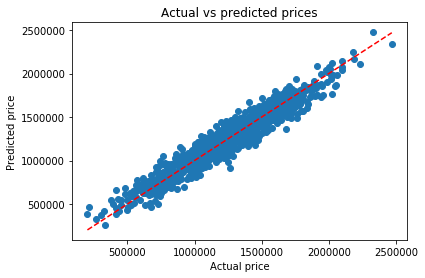

In [12]:
plt.scatter(x=y_test,y=y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='r',linestyle='--')
plt.title("Actual vs predicted prices")
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()

In [13]:
c=model.coef_
print(c)

[2.16522058e+01 1.64666481e+05 1.19624012e+05 2.44037761e+03
 1.52703134e+01]
